# Breast_Cancer_Prediction with accuracy 100%
#### I applied three models (Logistic Regression , Decision Tree and Random Forest)
* The Accuracy of Random Forest is 100% so we apply it
* The Accuracy of Logistic Regression is 98.87%
* The Accuracy of Decision Tree is 99.3%

### Import The Nessecary Libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# loading the data to DataFrame 
breast = pd.read_csv("data.csv")

### EDA

In [3]:
# print 5 first rows of the data 
breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# print shape of the data
breast.shape

(569, 33)

In [5]:
# getting some inforamtion about the data
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# checking for null values
breast.isnull().sum()/100

id                         0.00
diagnosis                  0.00
radius_mean                0.00
texture_mean               0.00
perimeter_mean             0.00
area_mean                  0.00
smoothness_mean            0.00
compactness_mean           0.00
concavity_mean             0.00
concave points_mean        0.00
symmetry_mean              0.00
fractal_dimension_mean     0.00
radius_se                  0.00
texture_se                 0.00
perimeter_se               0.00
area_se                    0.00
smoothness_se              0.00
compactness_se             0.00
concavity_se               0.00
concave points_se          0.00
symmetry_se                0.00
fractal_dimension_se       0.00
radius_worst               0.00
texture_worst              0.00
perimeter_worst            0.00
area_worst                 0.00
smoothness_worst           0.00
compactness_worst          0.00
concavity_worst            0.00
concave points_worst       0.00
symmetry_worst             0.00
fractal_

In [33]:
# statistical measures of the dataset
breast.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,0.371479,14.115949,19.292324,91.896972,653.707570,0.096381,0.104386,0.088803,0.048882,...,16.253836,25.681215,107.170475,878.689789,0.132384,0.254384,0.272242,0.114481,0.290102,0.083937
std,1.251246e+08,0.483626,3.516744,4.304353,24.259470,351.092917,0.014068,0.052848,0.079790,0.038827,...,4.823594,6.150937,33.562319,568.063198,0.022850,0.157449,0.208804,0.065722,0.061919,0.018076
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,0.000000,11.697500,16.170000,75.135000,420.175000,0.086400,0.064815,0.029540,0.020310,...,13.010000,21.075000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,0.000000,13.355000,18.855000,86.210000,548.750000,0.095895,0.093125,0.061400,0.033455,...,14.965000,25.425000,97.655000,685.550000,0.131350,0.213000,0.226550,0.099840,0.282250,0.080015
75%,8.825022e+06,1.000000,15.780000,21.802500,103.875000,782.625000,0.105325,0.130425,0.131000,0.074010,...,18.767500,29.757500,125.175000,1073.500000,0.146025,0.339300,0.383500,0.161325,0.318025,0.092082
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### Notes 
* the variance between columns large so we apply standardscaler to the data

In [7]:
# drop the two columns 
breast.drop(columns=["Unnamed: 32"] , index =1 , inplace= True)

In [8]:
breast["diagnosis"].value_counts()

B    357
M    211
Name: diagnosis, dtype: int64

In [9]:
# apply labelencoding on the column to convert (M B)to (1 0)
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
breast.iloc[:,1]=label.fit_transform(breast.iloc[:,1].values)

In [10]:
# print First 5 rows of the data
breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.1184,0.2776,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,84300903,1,19.69,21.25,130.00,1203.0,0.1096,0.1599,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.1278,0.1700,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


### Visualize the data

C:\Users\Mohamed Ganady\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

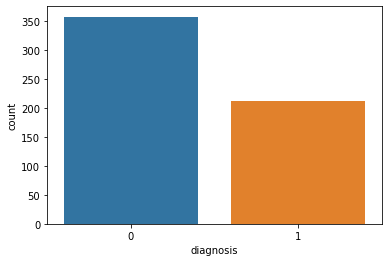

In [11]:
# the distribution of the data
sns.countplot(breast["diagnosis"] ,label="count")

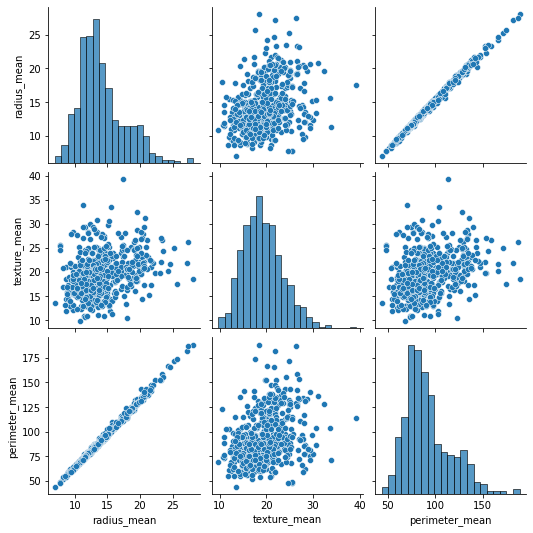

In [12]:
sns.pairplot(breast.iloc[:,2:5] )

In [13]:
# get the correlation
breast.iloc[:,1:32].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.729078,0.416657,0.741740,0.707944,0.361202,0.598659,0.697449,0.776719,0.330986,...,0.775706,0.458481,0.782189,0.732899,0.423003,0.592958,0.660938,0.793083,0.417493,0.323733
radius_mean,0.729078,1.000000,0.325919,0.997862,0.987284,0.173863,0.509302,0.678844,0.823410,0.148174,...,0.969361,0.299116,0.965038,0.940725,0.121199,0.416146,0.528956,0.743679,0.165235,0.006179
texture_mean,0.416657,0.325919,1.000000,0.331449,0.323348,-0.023920,0.236474,0.302436,0.293915,0.071410,...,0.354756,0.912025,0.359782,0.345851,0.077288,0.277637,0.300973,0.296334,0.104873,0.119402
perimeter_mean,0.741740,0.997862,0.331449,1.000000,0.986474,0.210386,0.559901,0.718006,0.851709,0.183483,...,0.969324,0.304935,0.970271,0.941255,0.152064,0.458275,0.565743,0.770745,0.190326,0.050313
area_mean,0.707944,0.987284,0.323348,0.986474,1.000000,0.180495,0.501855,0.688274,0.824292,0.151776,...,0.962528,0.289694,0.959027,0.958953,0.125203,0.393184,0.514762,0.721429,0.144862,0.002802
smoothness_mean,0.361202,0.173863,-0.023920,0.210386,0.180495,1.000000,0.658948,0.522264,0.554974,0.558113,...,0.216502,0.035560,0.241735,0.210260,0.805362,0.472203,0.434982,0.505466,0.394212,0.500062
compactness_mean,0.598659,0.509302,0.236474,0.559901,0.501855,0.658948,1.000000,0.883285,0.831999,0.602768,...,0.538524,0.247898,0.592882,0.512948,0.565407,0.865762,0.816335,0.817527,0.510148,0.687815
concavity_mean,0.697449,0.678844,0.302436,0.718006,0.688274,0.522264,0.883285,1.000000,0.921658,0.500667,...,0.690297,0.299900,0.731148,0.678204,0.448862,0.755073,0.884114,0.862267,0.409476,0.514978
concave points_mean,0.776719,0.823410,0.293915,0.851709,0.824292,0.554974,0.831999,0.921658,1.000000,0.462618,...,0.831184,0.293221,0.856446,0.810573,0.453292,0.668155,0.752755,0.910294,0.376099,0.368513
symmetry_mean,0.330986,0.148174,0.071410,0.183483,0.151776,0.558113,0.602768,0.500667,0.462618,1.000000,...,0.186259,0.090662,0.219621,0.177749,0.426729,0.473278,0.433730,0.430742,0.699863,0.438443


<AxesSubplot:>

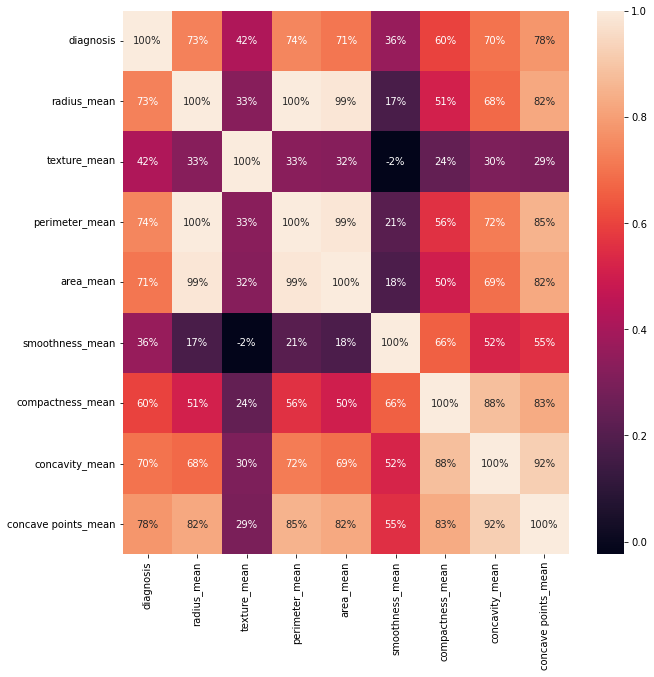

In [14]:
# visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(breast.iloc[:,1:10].corr(),annot=True,fmt=".0%")

### Split the data

In [15]:
# split the dataset into dependent(X) and Independent(Y) datasets
X=breast.iloc[:,2:31].values
y=breast.iloc[:,1].values

In [16]:
# spliting the data into trainning and test dateset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=44 , shuffle=True)

In [25]:
# feature scaling
from sklearn.preprocessing import StandardScaler
X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)

In [34]:
# apply models to the data 

def models (X_train,y_train):
        #logistic regression
        from sklearn.linear_model import LogisticRegression
        log=LogisticRegression(random_state=44)
        log.fit(X_train,y_train)
        
        
        #Decision Tree
        from sklearn.tree import DecisionTreeClassifier
        tree = DecisionTreeClassifier(random_state=44,criterion="entropy")
        tree.fit(X_train,y_train)
        
        #Random Forest
        from sklearn.ensemble import RandomForestClassifier
        forest=RandomForestClassifier(random_state=44,criterion="entropy",n_estimators=10)
        forest.fit(X_train,y_train)
        
        print('[0]logistic regression accuracy:',log.score(X_train,y_train)*100)
        print('[1]Decision tree accuracy:',tree.score(X_train,y_train)*100)
        print('[2]Random forest accuracy:',forest.score(X_train,y_train)*100)
        
        return log,tree,forest

In [35]:
model=models(X_train,y_train)

[0]logistic regression accuracy: 98.89867841409692
[1]Decision tree accuracy: 100.0
[2]Random forest accuracy: 99.33920704845815


In [31]:
# testing the models/result

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

for i in range(len(model)):
    print("Model",i)
    print(classification_report(y_test , model[i].predict(X_test)))
    print('Accuracy : ',accuracy_score(y_test,model[i].predict(X_test)))
    print("################################################################################")

Model 0
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        78
           1       0.90      0.97      0.93        36

    accuracy                           0.96       114
   macro avg       0.94      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy :  0.956140350877193
################################################################################
Model 1
              precision    recall  f1-score   support

           0       0.94      0.87      0.91        78
           1       0.76      0.89      0.82        36

    accuracy                           0.88       114
   macro avg       0.85      0.88      0.86       114
weighted avg       0.89      0.88      0.88       114

Accuracy :  0.8771929824561403
################################################################################
Model 2
              precision    recall  f1-score   support

           0       0.99      0.91      0.95 

In [29]:
# prediction of random-forest
pred= model[2].predict(X_test)
print('Predicted values:')
print(pred)
print('Actual values:')
print(y_test)

Predicted values:
[1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1
 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0
 1 0 0]
Actual values:
[1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0
 1 0 0]
